# 한글

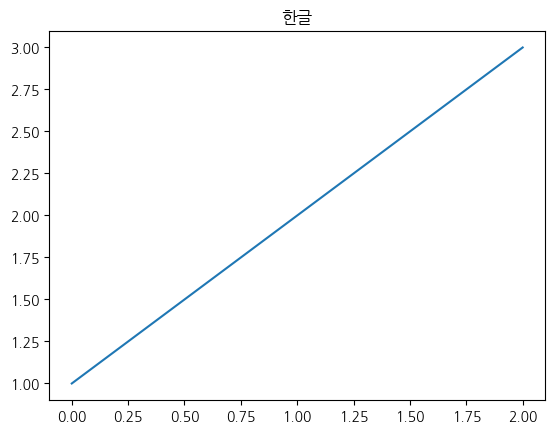

In [5]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# XGBoost 설치

# 불러오기

In [6]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
data = pd.read_csv('../data/for_ship_model.csv') 

# 베이스라인 코드

In [8]:
# 필요한 라이브러리 불러오기
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# 입력 변수와 타겟 변수 나누기
X = data[['총톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '깊이(m)', '길이1(m)', 'ETA_Hour', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']]
y = data['접안_대기시간_분']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# XGBoost 모델 생성 및 학습
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # 회귀 문제이므로 'reg:squarederror'를 사용
    max_depth=5,
    learning_rate=0.3,
    n_estimators=200
)

model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# 결정 계수(R-squared) 계산
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# 특성 중요도 출력
feature_importance = model.feature_importances_
feature_names = X.columns

print("Feature Importance:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")


RMSE: 1116.969078207694
MAE: 548.2322071704745
R-squared: 0.023040318779233626
Feature Importance:
총톤수: 0.05147053673863411
선박제원(총길이, m): 0.0433955080807209
선박제원(너비, m): 0.13960358500480652
깊이(m): 0.058407653123140335
길이1(m): 0.054356638342142105
ETA_Hour: 0.05418167635798454
풍속(m/s): 0.0686124861240387
풍향(deg): 0.04281482473015785
GUST풍속(m/s): 0.04160956293344498
현지기압(hPa): 0.06763027608394623
습도(%): 0.04916463419795036
기온(°C): 0.043965116143226624
수온(°C): 0.04432656615972519
최대파고(m): 0.052622370421886444
유의파고(m): 0.04345255717635155
평균파고(m): 0.033965423703193665
파주기(sec): 0.054315414279699326
파향(deg): 0.05610506609082222


In [9]:
# 필요한 라이브러리 불러오기
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# 입력 변수와 타겟 변수 나누기
X = data[['총톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '깊이(m)', '길이1(m)', 'ETA_Hour', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']]
y = data['접안_대기시간_분']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# XGBoost 모델 생성
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # 회귀 문제이므로 'reg:squarederror'를 사용
    max_depth=5,
    learning_rate=0.3,
    n_estimators=200
)

# 10-fold 교차 검증 수행
scoring = 'neg_mean_squared_error'  # 단일 메트릭 선택

cv_results = cross_val_score(model, X, y, cv=10, scoring=scoring)

# 결과 출력
rmse = np.sqrt(-cv_results.mean())
print(f"RMSE: {rmse}")

# 특성 중요도 출력
model.fit(X_train, y_train)  # 전체 데이터로 모델 학습
feature_importance = model.feature_importances_
feature_names = X.columns

print("특성 중요도:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")


RMSE: 1144.208956441329
특성 중요도:
총톤수: 0.05147053673863411
선박제원(총길이, m): 0.0433955080807209
선박제원(너비, m): 0.13960358500480652
깊이(m): 0.058407653123140335
길이1(m): 0.054356638342142105
ETA_Hour: 0.05418167635798454
풍속(m/s): 0.0686124861240387
풍향(deg): 0.04281482473015785
GUST풍속(m/s): 0.04160956293344498
현지기압(hPa): 0.06763027608394623
습도(%): 0.04916463419795036
기온(°C): 0.043965116143226624
수온(°C): 0.04432656615972519
최대파고(m): 0.052622370421886444
유의파고(m): 0.04345255717635155
평균파고(m): 0.033965423703193665
파주기(sec): 0.054315414279699326
파향(deg): 0.05610506609082222


# 최종 비교용 모델링

## 수정(참고내용)

In [11]:
import pandas as pd
# CSV 파일 불러오기
Final_D = pd.read_csv('../data/for_ship_model.csv') 

In [12]:
Final_D.columns

Index(['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)', '풍속(m/s)',
       '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)',
       '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded'],
      dtype='object')

In [13]:
Final_D.columns = ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '선박_길이1', '풍속',
       '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온',
       '최대파고', '유의파고', '평균파고', '파주기', '파향', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded']

x_cols = ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour',
       'Service_Time_분', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '풍속',
       '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온', '최대파고', '유의파고', '평균파고',
        '파주기', '파향', '이전_입항선박수','시설연평균_재화중량톤수', 
        '연평균_총입항건수', '선박_연평균_서비스시간', '계선장소명_encoded', '선박용도_encoded']

## 모델링

RMSE: 1096.2605242253724
MAE: 537.4936517424746
특성 중요도:


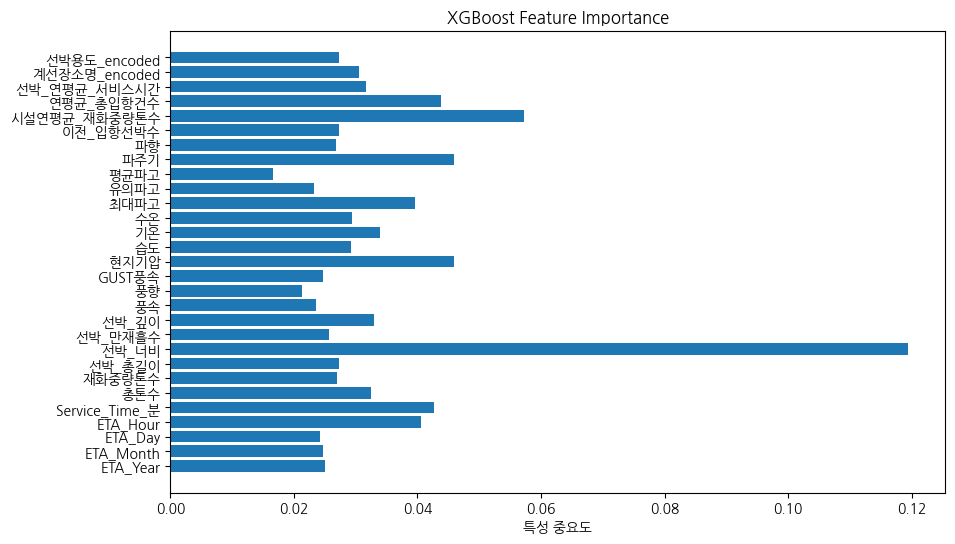

In [14]:
# 필요한 라이브러리 불러오기
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error  # 추가: MAE를 위한 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 추가: 시각화를 위한 모듈

# 입력 변수와 타겟 변수 나누기
X = Final_D[x_cols]
y = Final_D['접안_대기시간_분']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# XGBoost 모델 생성
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.3,
    n_estimators=200
)

# 10-fold 교차 검증 수행
scoring = 'neg_mean_squared_error'
cv_results = cross_val_score(model, X, y, cv=10, scoring=scoring)

# 결과 출력
rmse = np.sqrt(-cv_results.mean())
print(f"RMSE: {rmse}")

# 추가: MAE 계산 및 출력
mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
mae = mae_scores.mean()
print(f"MAE: {mae}")

# 특성 중요도 출력
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
feature_names = X.columns

print("특성 중요도:")

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('특성 중요도')
plt.title('XGBoost Feature Importance')
plt.show()
